# 투자할 주식 종목을 뽑아주는 노트

In [2]:
import pickle
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot  as plt
import warnings

warnings.filterwarnings(action='ignore')

In [3]:
# 확인하면 되는 것들
std_date = '20221202'
N = 1500

DATA_PATH = f'./db_and_model/stock_data_{std_date}_{N}.csv'

In [4]:
def earning_rate(stock_price : list, start_date, end_date):
    '''start_date부터 end_date까지 stock_price데이터를 가지고 수익률을 구해주는 함수(종가 기준)'''
    possible_start_date = stock_price[stock_price.index >= start_date].index[0]
    possible_end_date = stock_price[stock_price.index <= end_date].index[-1]
    
    start_price = stock_price.loc[possible_start_date].Close
    end_price = stock_price.loc[possible_end_date].Close
    
    return (end_price - start_price) / start_price

def preprocess(data_path):
    """데이터 불러오기 + 전처리"""
    # raw_data = pd.read_csv(DATA_PATH, encoding='cp949')
    raw_data = pd.read_csv(DATA_PATH, encoding='utf-8')
    # raw_data = pd.read_csv(DATA_PATH)
    raw_data.drop(raw_data[raw_data['PER'] == 0].index, inplace=True) # PER 0인 종목 제외
    raw_data.drop(raw_data[raw_data['PBR'] == 0].index, inplace=True) # PBR 0인 종목 제외

    return raw_data.reset_index()

def pred(data_path=DATA_PATH):
    raw_data = preprocess(data_path)

    col_names = ["12개월 간 수익률", "KOSPI대비 12개월 간 수익률" , "12개월 간 KOSPI 이김" , 'PER_inv' , 'PBR_inv' , "배당수익률"]
    X = raw_data[col_names]

    # MODEL_FILEPATH = './db_and_model/stock_pred_model.pkl'
    MODEL_FILEPATH = './db_and_model/Seasonal(November_to_April)_Stock_Pred_Model(20221030).pkl'
    with open(MODEL_FILEPATH, 'rb') as pickle_file:
        stock_pred_model = pickle.load(pickle_file)

    y = stock_pred_model.predict_proba(X)[:, 1]
    y = pd.DataFrame(y, columns=['y'])

    # 결과 dataFrame
    res = raw_data.copy()
    res['y'] = y.values

    return res

res = pred()

top_stocks = res.sort_values(by='y', ascending=False).head(50)

top_stocks[['name', 'PER', 'PBR', '12개월 간 수익률', 'y']].reset_index(drop=True)
# top_stocks.reset_index(drop=True)

,name,PER,PBR,12개월 간 수익률,y
0,세아베스틸지주,3.74,0.38,0.037135,0.881053
1,JB금융지주,3.34,0.39,0.043532,0.880844
2,우리금융지주,3.66,0.36,0.024096,0.877605
3,하나금융지주,3.85,0.39,0.128872,0.875434
4,화성산업,5.35,0.38,0.162996,0.849835
5,황금에스티,4.41,0.44,0.007147,0.835804
6,락앤락,21.09,0.48,-0.360000,0.835267
7,금호타이어,10000.00,0.74,-0.252174,0.832872
8,기업은행,3.89,0.33,0.076923,0.831665
9,대현,5.57,0.49,0.165865,0.827119


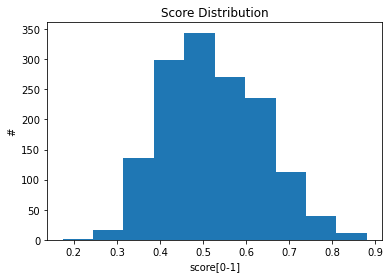

In [5]:
# 점수 분포
fig = plt.figure()
plt.hist(res['y'])
plt.title('Score Distribution')
plt.xlabel('score[0-1]')
plt.ylabel('#')
plt.show()

In [6]:
res[res['name'] == '크래프톤']

,index,Unnamed: 0,date,code,12개월 간 수익률,name,KOSPI 12개월 간 수익률,KOSPI대비 12개월 간 수익률,12개월 간 KOSPI 이김,PER,PBR,배당수익률,PER_inv,PBR_inv,y
37,37,37,20221202,259960,-0.587935,크래프톤,-0.160495,-0.42744,0,16.76,2.05,0.0,0.059666,0.487805,0.608682


In [7]:
res[res['name'] == '현대차']

,index,Unnamed: 0,date,code,12개월 간 수익률,name,KOSPI 12개월 간 수익률,KOSPI대비 12개월 간 수익률,12개월 간 KOSPI 이김,PER,PBR,배당수익률,PER_inv,PBR_inv,y
7,7,7,20221202,005380,-0.159204,현대차,-0.160495,0.001291,1,8.9,0.58,2.96,0.11236,1.724138,0.432951


In [8]:
res[res['name'] == '카카오']

,index,Unnamed: 0,date,code,12개월 간 수익률,name,KOSPI 12개월 간 수익률,KOSPI대비 12개월 간 수익률,12개월 간 KOSPI 이김,PER,PBR,배당수익률,PER_inv,PBR_inv,y
10,10,10,20221202,035720,-0.53551,카카오,-0.160495,-0.375015,0,17.67,2.47,0.09,0.056593,0.404858,0.573129


In [9]:
res[res['name'] == '삼성전자']

,index,Unnamed: 0,date,code,12개월 간 수익률,name,KOSPI 12개월 간 수익률,KOSPI대비 12개월 간 수익률,12개월 간 KOSPI 이김,PER,PBR,배당수익률,PER_inv,PBR_inv,y
0,0,0,20221202,005930,-0.188172,삼성전자,-0.160495,-0.027677,0,10.46,1.38,2.39,0.095602,0.724638,0.558776


In [11]:
res[res['name'] == 'NAVER']

,index,Unnamed: 0,date,code,12개월 간 수익률,name,KOSPI 12개월 간 수익률,KOSPI대비 12개월 간 수익률,12개월 간 KOSPI 이김,PER,PBR,배당수익률,PER_inv,PBR_inv,y
8,8,8,20221202,035420,-0.524359,NAVER,-0.160495,-0.363864,0,1.67,1.18,0.28,0.598802,0.847458,0.606528


In [7]:
# 금융주, 우선주 제외
condition2 = ~(res.name.str.contains('지주') | res.name.str.contains('홀딩스')
    | res.name.str.contains('은행') | res.name.str.contains('금융') | res.name.str.contains('보험')
     | res.name.str.contains('증권') | res.name.str.contains('생명') | res.name.str.endswith('우'))

top_stocks_2 = res[condition2].sort_values(by='y', ascending=False).head(50)

top_stocks_2

,index,Unnamed: 0,date,code,12개월 간 수익률,name,KOSPI 12개월 간 수익률,KOSPI대비 12개월 간 수익률,12개월 간 KOSPI 이김,PER,PBR,배당수익률,PER_inv,PBR_inv,y
139,140,140,20221021,000120,-0.449498,CJ대한통운,-0.265508,-0.183990,0,44.70,0.46,0.00,0.022371,2.173913,0.848141
876,896,896,20221021,136490,-0.431618,선진,-0.265508,-0.166110,0,4.28,0.44,1.29,0.233645,2.272727,0.834009
585,599,599,20221021,071840,-0.566372,롯데하이마트,-0.265508,-0.300864,0,10000.00,0.16,8.16,0.000100,6.250000,0.824986
551,564,564,20221021,115390,-0.438532,락앤락,-0.265508,-0.173024,0,19.68,0.44,0.00,0.050813,2.272727,0.823548
37,37,37,20221021,051900,-0.587050,LG생활건강,-0.265508,-0.321542,0,11.39,1.79,2.09,0.087796,0.558659,0.822427
240,242,242,20221021,073240,-0.452424,금호타이어,-0.265508,-0.186916,0,10000.00,0.75,0.00,0.000100,1.333333,0.820762
950,972,972,20221021,079980,-0.514602,휴비스,-0.265508,-0.249094,0,43.42,0.34,6.22,0.023031,2.941176,0.814666
764,780,780,20221021,084110,-0.630069,휴온스글로벌,-0.265508,-0.364561,0,53.26,0.40,2.92,0.018776,2.500000,0.812576
557,571,571,20221021,068400,-0.466116,SK렌터카,-0.265508,-0.200608,0,14.26,0.61,0.00,0.070126,1.639344,0.811102
615,630,630,20221021,104480,-0.568543,티케이케미칼,-0.265508,-0.303035,0,0.76,0.41,0.00,1.315789,2.439024,0.809899


In [1]:
1.03**6

1.1940522965290001

In [39]:
(1.25**2)**7

22.737367544323206